## Calorimeter regression test
### Author: stephen.menary@manchester.ac.uk

---

### Step 1)  Grab a dataset of rings labelled by momentum (radius)

---

In [38]:
#  Create simulated dataset of rings and showers
#  -  datapoints are labelled by momentum

import Tools.shower_test_tools as tools

import numpy as np

num_pixels      = 51
num_simulations = 5000

TRAIN_X, TRAIN_Y, VAL_X, VAL_Y, TEST_X, TEST_Y = tools.get_rings_with_coordinates(do_x=False, do_x=False, do_p=True, num_pixels=num_pixels, num_simulations=num_simulations)

print(f"  TRAINING DATASET with size {len(TRAIN_X)}")
print(f"VALIDATION DATASET with size {len(VAL_X  )}")
print(f"      TEST DATASET with size {len(TEST_X )}")

Generating rings... 100%
5000 rings saved to file
  TRAINING DATASET with size 2500
VALIDATION DATASET with size 1250
      TEST DATASET with size 1250


---

### Step 2)  Plot some examples of our images

---

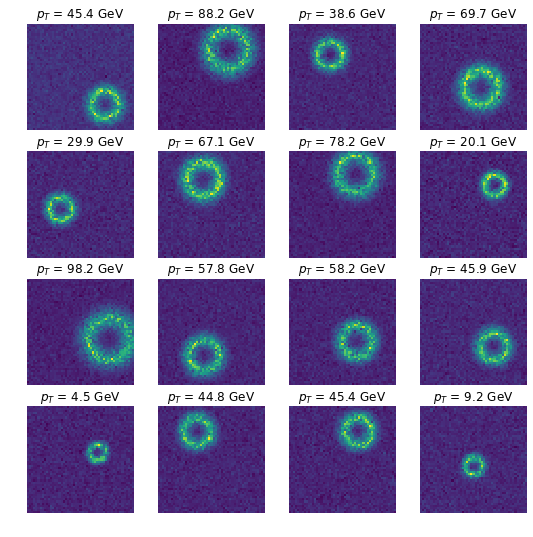

In [39]:
#  Plot some examples of datapoints
#

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
for idx, (im, label) in enumerate(zip(TRAIN_X[:16], TRAIN_Y[:16])) :
    z = im[:,:,0]
    plt.subplot(4, 4, 1+idx)
    plt.imshow(z)
    plt.axis('off')
    plt.title(f"$p_T$ = {label[0]:.1f} GeV")
    #plt.title(f"{label[0]:.2f}, {label[1]:.2f}, {100.*label[2]:.0f}")
plt.show()

---

### Step 3)  Create a CNN regression network

---

In [49]:
#  Create regression network
#

from keras.layers import Dense, Flatten, Conv2D
from keras.models import Model, Sequential

def create_regression_network () :
    model = Sequential()
    model.add(Conv2D(15, kernel_size=3, activation="relu", input_shape=(num_pixels, num_pixels, 1)))
    model.add(Flatten())
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer="adam", loss="mse")
    return model

model = create_regression_network()

---

### Step 4)  Train the network

---

In [50]:
#  Fit the training data
#  - using early stopping, and storing best solution
#

from keras.callbacks import EarlyStopping, ModelCheckpoint

model.fit(TRAIN_X, 
          TRAIN_Y, 
          validation_data=(VAL_X, VAL_Y), 
          epochs=10000, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=20),
                     ModelCheckpoint('.model2.hdf5', save_best_only=True, monitor='val_loss')])

model.load_weights('.model2.hdf5')

Train on 2500 samples, validate on 1250 samples
Epoch 1/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 1887.4847 - val_loss: 469.6827
Epoch 2/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 314.9003 - val_loss: 190.9346
Epoch 3/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 65.0796 - val_loss: 70.5970
Epoch 4/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 23.4221 - val_loss: 43.6044
Epoch 5/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 13.4446 - val_loss: 28.3287
Epoch 6/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 10.2947 - val_loss: 15.4824
Epoch 7/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 6.7285 - val_loss: 12.4046
Epoch 8/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 5.1437 - val_loss: 13.2345
Epoch 9/10000
2500/2500 [==============================] - 3s 1ms/step - loss: 4.2409 - val_l

---

### Step 5)  Make predictions using the test data

---

In [51]:
#  Make predictions on test dataset
#

test_predictions = model.predict(TEST_X)

---

### Step 6) Plot correlation between true and predicted momenta

---

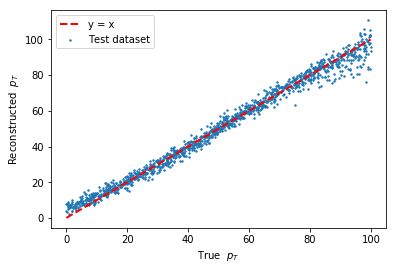

In [56]:
plt.scatter(TEST_Y, test_predictions, s=2, label="Test dataset")
x_min, x_max = min(TEST_Y), max(TEST_Y)
plt.plot(np.linspace(x_min, x_max, 2), np.linspace(x_min, x_max, 2), "--", c="r", linewidth=2, label="y = x")
plt.xlabel("True  $p_T$")
plt.ylabel("Reconstructed  $p_T$")
plt.legend(loc="upper left")
plt.show()

---

### Step 7)  Plot some datapoints along with real and predicted momenta

---

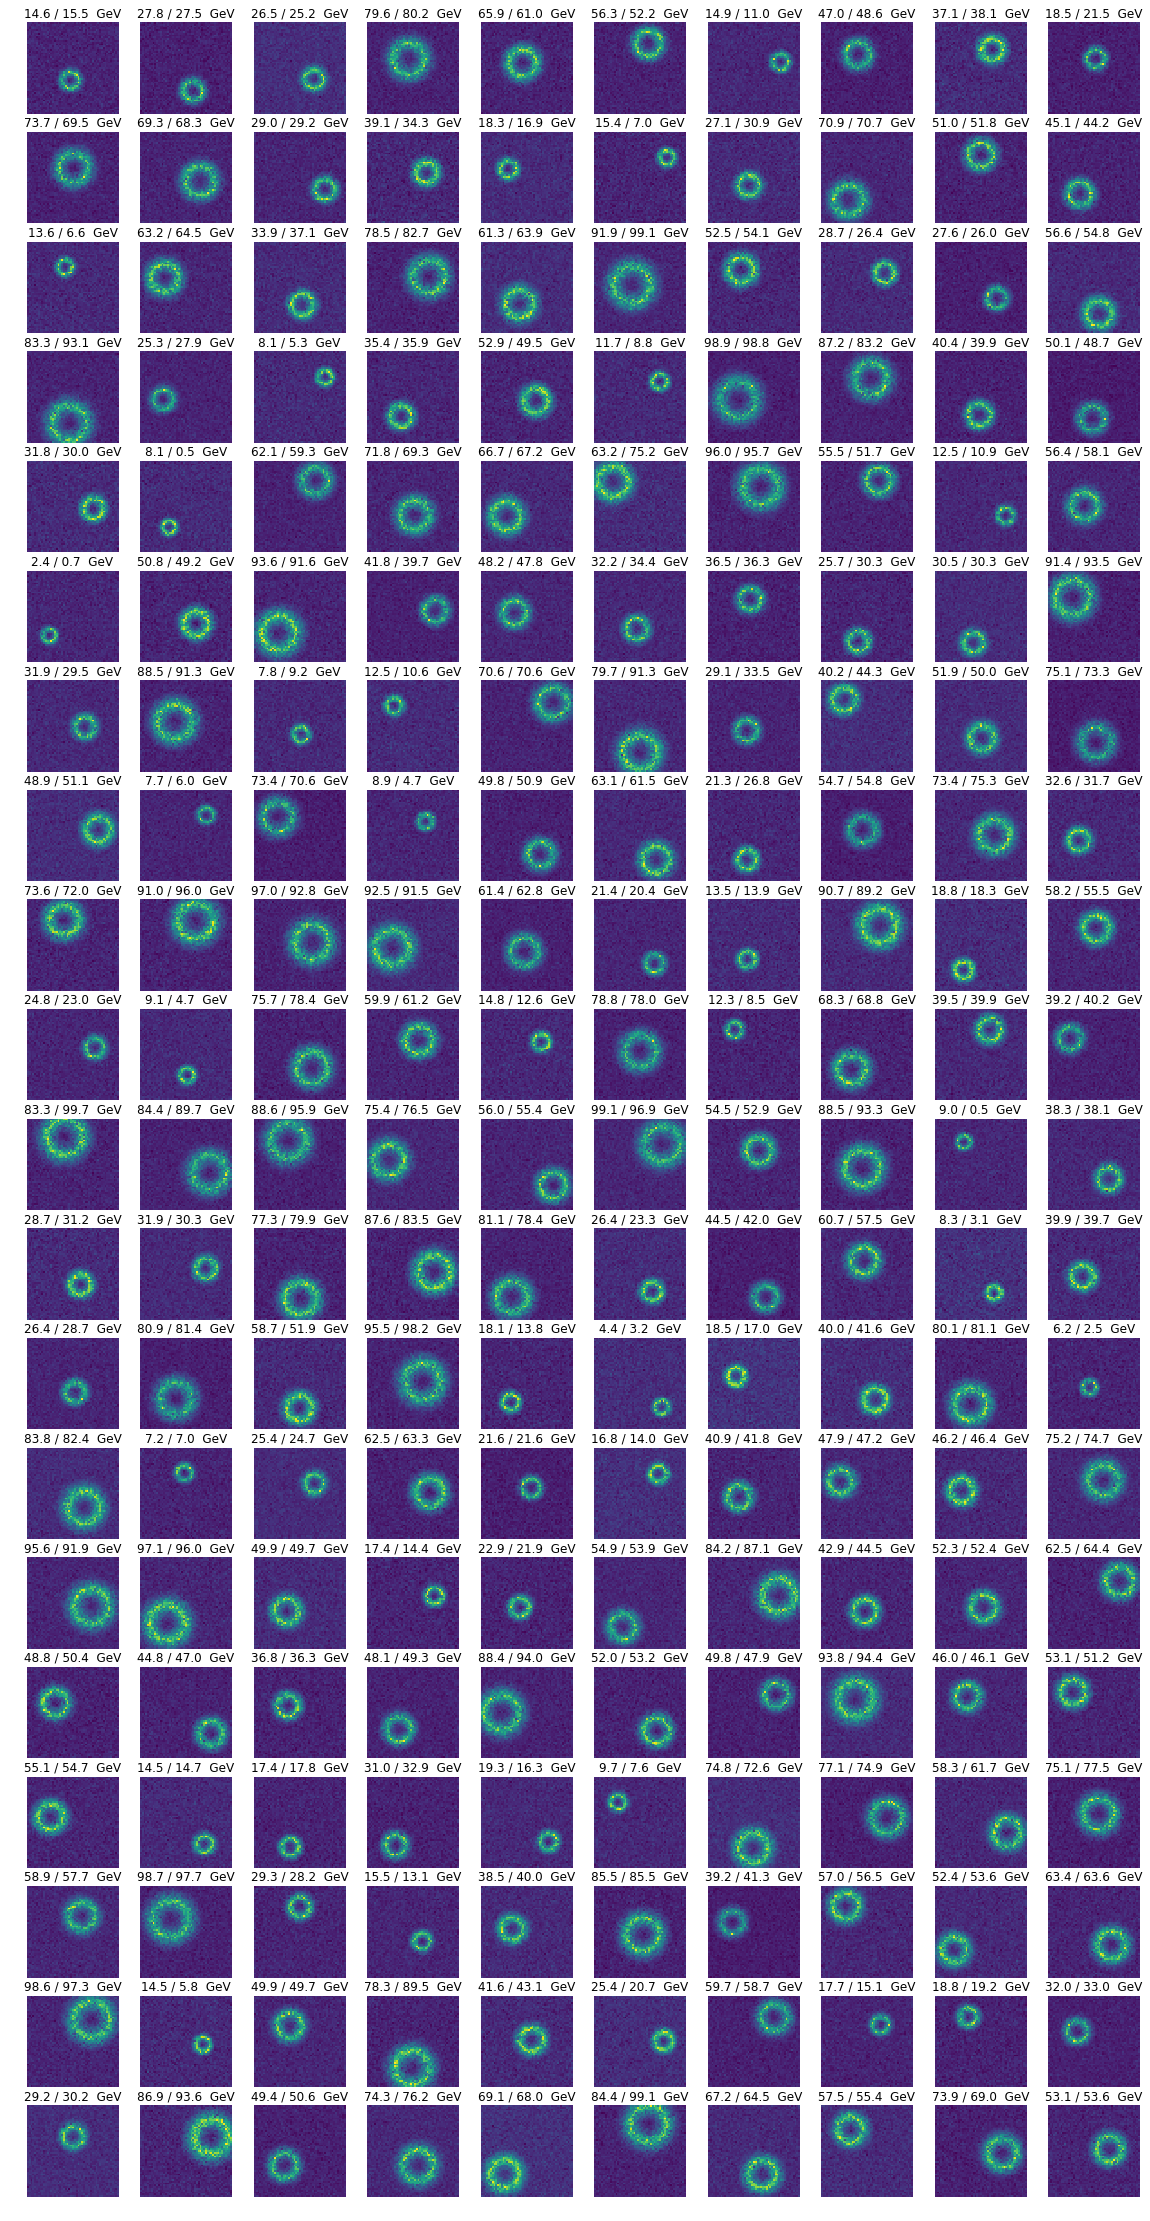

In [54]:
#  Plot some of the predictions
#

fig = plt.figure(figsize=(20,40))
for idx, (im, label, pred) in enumerate(zip(TEST_X[:200], TEST_Y[:200], test_predictions[:200])) :
    z = im[:,:,0]
    plt.subplot(20, 10, 1+idx)
    plt.imshow(z)
    plt.axis('off')
    plt.title(f"{pred[0]:.1f} / {label[0]:.1f}  GeV")
    #plt.title(f"{pred[0]:.2f}, {pred[1]:.2f}, {100.*pred[2]:.0f}\n{label[0]:.2f}, {label[1]:.2f}, {100.*label[2]:.0f}")
plt.show()